<a href="https://colab.research.google.com/github/Vidhi1290/Master-Dissertation/blob/main/Human_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Patch-based Image Inpainting using Convolutional Autoencoder

# MODEL-1

### ABOUT MODEL:

`STEP1:]` The code supplied provides an autoencoder model to recreate pictures that have been randomly damaged by patches. The Keras package is used to build the model, which comprises of many convolutional layers for encoding and decoding the input pictures.

`STEP2:]` This project's dataset comprises of human faces and is loaded from a given directory. The size and quantity of photos utilised in the model are also specified. To boost the variety of the training set, data augmentation is done to the pictures.

`STEP3:]` Random patches are removed from the enhanced photos to imitate image disintegration. After training the autoencoder on the destroyed photos, the learned model is utilised to reconstruct the original images from the destroyed ones.

`STEP4:]` For visual comparison, the regenerated photos are exhibited alongside the original and destroyed copies. The ImageDataGenerator from Keras is used to supplement the data, and the Adam optimizer is used to train the model.

`STEP5:]` Overall, this code illustrates a valuable usage of autoencoders in picture regeneration and might serve as a starting point for further study in this field. For more background information, references to the Keras library and pertinent machine learning techniques might be provided.



### ` DATASET USED: HUMANS DATASET`

### ` SOURCE: https://www.kaggle.com/datasets/ashwingupta3012/human-faces`

REFERENCES: 

1. Keras documentation on image inpainting: https://keras.io/examples/generative/image_inpainting/

2. A review article on image inpainting techniques: https://www.sciencedirect.com/science/article/pii/S0925231218306745 

3. Convolutional Autoencoder in Keras: https://blog.keras.io/building-autoencoders-in-keras.html


### ABOUT DATASET:

A collection of 7.2k+ images useful for multiple use cases such image identifiers, classifier algorithms etc.

A thorough mix of all common creeds, races, age groups and profiles in an attempt to create a unbiased dataset.

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import os
import cv2
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

# Define the path to the human faces dataset
dataset_path = '/content/drive/MyDrive/Humans'

# Define the image size and number of images to use
image_size = (124, 124)
num_images = 5000

# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Load and preprocess the images
images = []
for subdir, _, files in os.walk(dataset_path):
    for file in files:
        image_path = os.path.join(subdir, file)
        img = cv2.imread(image_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, image_size)
        images.append(img)
        if len(images) >= num_images:
            break
    if len(images) >= num_images:
        break

X = np.array(images) / 255.0

# Apply data augmentation to the images
datagen.fit(X)
X_augmented = np.concatenate([X] + [datagen.flow(X, shuffle=True).next() for i in range(10)])

# Define a function to randomly destroy patches of the images
def destroy_patches(X, patch_size):
    X_destroyed = np.copy(X)
    for i in range(len(X)):
        x = np.random.randint(0, X.shape[2] - patch_size[0])
        y = np.random.randint(0, X.shape[1] - patch_size[1])
        X_destroyed[i, y:y+patch_size[1], x:x+patch_size[0], :] = 0.0
    return X_destroyed

# Destroy patches of the images
patch_size = (32, 32)
X_destroyed = destroy_patches(X_augmented, patch_size)

# Define the autoencoder model
input_img = Input(shape=(image_size[0], image_size[1], 3))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [17]:
#Train the autoencoder on the destroyed images
autoencoder.fit(X_destroyed, X_augmented,
epochs=50,
batch_size=32,
shuffle=True)

Epoch 1/50
74/74 [==============================] - 4s 25ms/step - loss: 0.6334
Epoch 2/50
74/74 [==============================] - 1s 18ms/step - loss: 0.5435
Epoch 3/50
74/74 [==============================] - 2s 21ms/step - loss: 0.5283
Epoch 4/50
74/74 [==============================] - 2s 21ms/step - loss: 0.5220
Epoch 5/50
74/74 [==============================] - 2s 20ms/step - loss: 0.5183
Epoch 6/50
74/74 [==============================] - 1s 18ms/step - loss: 0.5163
Epoch 7/50
74/74 [==============================] - 1s 18ms/step - loss: 0.5152
Epoch 8/50
74/74 [==============================] - 1s 18ms/step - loss: 0.5140
Epoch 9/50
74/74 [==============================] - 1s 18ms/step - loss: 0.5137
Epoch 10/50
74/74 [==============================] - 1s 19ms/step - loss: 0.5124
Epoch 11/50
74/74 [==============================] - 1s 18ms/step - loss: 0.5117
Epoch 12/50
74/74 [==============================] - 1s 19ms/step - loss: 0.5113
Epoch 13/50
74/74 [==================

74/74 [==============================] - 1s 6ms/step


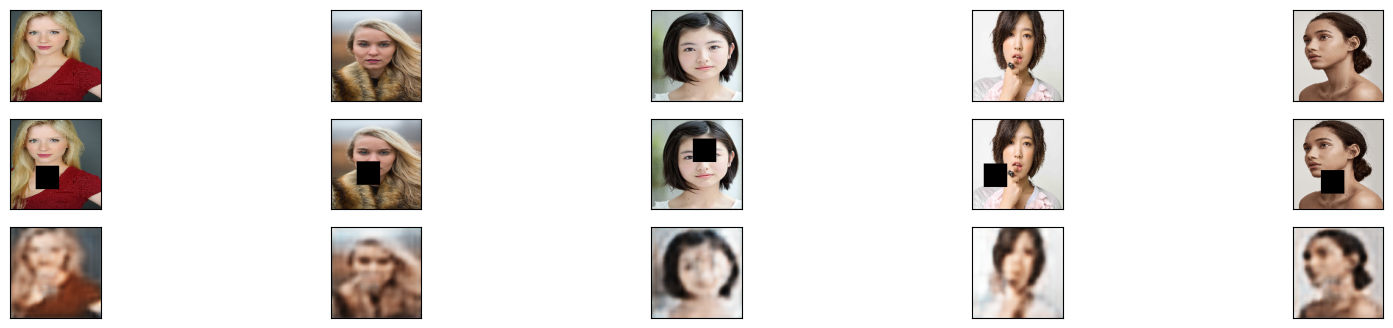

In [18]:
#Use the trained autoencoder to regenerate the images
X_regenerated = autoencoder.predict(X_destroyed)

#Display some examples of the original, destroyed, and regenerated images
import matplotlib.pyplot as plt
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
  # Original image
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(X[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Destroyed image
  ax = plt.subplot(3, n, i + n + 1)
  plt.imshow(X_destroyed[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Regenerated image
  ax = plt.subplot(3, n, i + 2*n + 1)
  plt.imshow(X_regenerated[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

# Patch-based Image Inpainting using Convolutional Autoencoder -- MODIFIED VERSION

## `DAATSET IS SAME AS ABOVE, JUST THAT I HAVE MODIFIED IT A LITTLE BIT FOR THE BETTER RESULTS`

## MODIFICATIONS DONE:

1. For picture denoising and reconstruction, this code employs an autoencoder neural network model. The autoencoder is trained on a dataset of human faces, with portions of the pictures destroyed at random to represent noise and flaws. The autoencoder is fed the damaged photos, and the purpose is to learn a mapping from the noisy images to the original clean ones.

2. The autoencoder model is made up of an encoder and a decoder, with the encoder mapping the input pictures to a lower-dimensional latent space and the decoder mapping the latent representations back to the original image space. The encoder is made up of numerous convolutional layers that perform max pooling operations, whereas the decoder is made up of multiple convolutional layers that perform upsampling operations. The mean squared error (MSE) loss function and the Adam optimizer are used to train the model.

3. Data augmentation is applied to the input images using an image data generator, which randomly applies transformations such as rotation, translation, and scaling to the images to increase the size of the training dataset and improve the model's ability to generalize to new data.

4. The trained autoencoder model is used to reconstruct the original clean pictures from noisy and defective photos. The autoencoder's performance is assessed by comparing the regenerated pictures to the original clean images and measuring the reconstruction quality. Matplotlib is used to visualise several samples of the original, destroyed, and regenerated photos.

This method of picture denoising and reconstruction has applications in many areas, including medical imaging, computer vision, and digital image processing.


# MODEL -2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the human faces dataset
dataset_path = '/content/drive/MyDrive/Humans'

# Load the images and resize them to 64x64
image_size = (64, 64)
images = []
for subdir, _, files in os.walk(dataset_path):
    for file in files:
        image_path = os.path.join(subdir, file)
        img = cv2.imread(image_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, image_size)
        images.append(img)

X = np.array(images) / 255.0

# Define a function to randomly destroy patches of the images
def destroy_patches(X, patch_size):
    X_destroyed = np.copy(X)
    for i in range(len(X)):
        x = np.random.randint(0, X.shape[2] - patch_size[0])
        y = np.random.randint(0, X.shape[1] - patch_size[1])
        X_destroyed[i, y:y+patch_size[1], x:x+patch_size[0], :] = 0.0
    return X_destroyed

# Destroy patches of the images
patch_size = (8, 8)
X_destroyed = destroy_patches(X, patch_size)

# Define an image data generator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

# Define the autoencoder model
input_img = Input(shape=(image_size[0], image_size[1], 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

#Train the autoencoder on the destroyed images
autoencoder.fit(X_destroyed, X,
epochs=10,
batch_size=32,
shuffle=True)

Epoch 1/10
64/64 [==============================] - 60s 913ms/step - loss: 0.0444
Epoch 2/10
64/64 [==============================] - 58s 914ms/step - loss: 0.0178
Epoch 3/10
64/64 [==============================] - 59s 917ms/step - loss: 0.0144
Epoch 4/10
64/64 [==============================] - 58s 916ms/step - loss: 0.0130
Epoch 5/10
64/64 [==============================] - 59s 918ms/step - loss: 0.0119
Epoch 6/10
64/64 [==============================] - 58s 910ms/step - loss: 0.0113
Epoch 7/10
64/64 [==============================] - 58s 901ms/step - loss: 0.0109
Epoch 8/10
64/64 [==============================] - 58s 898ms/step - loss: 0.0105
Epoch 9/10
64/64 [==============================] - 60s 930ms/step - loss: 0.0101
Epoch 10/10
64/64 [==============================] - 62s 949ms/step - loss: 0.0098


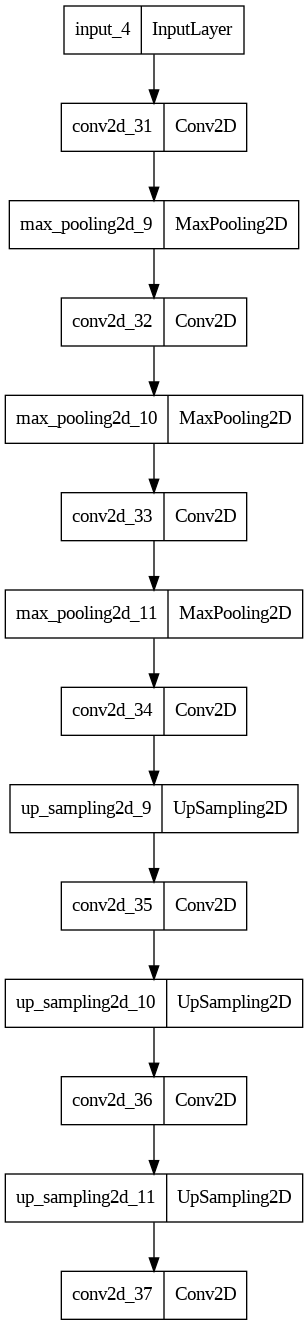

In [ ]:
from tensorflow import keras
import pydot
keras.utils.plot_model(autoencoder)

64/64 [==============================] - 14s 214ms/step


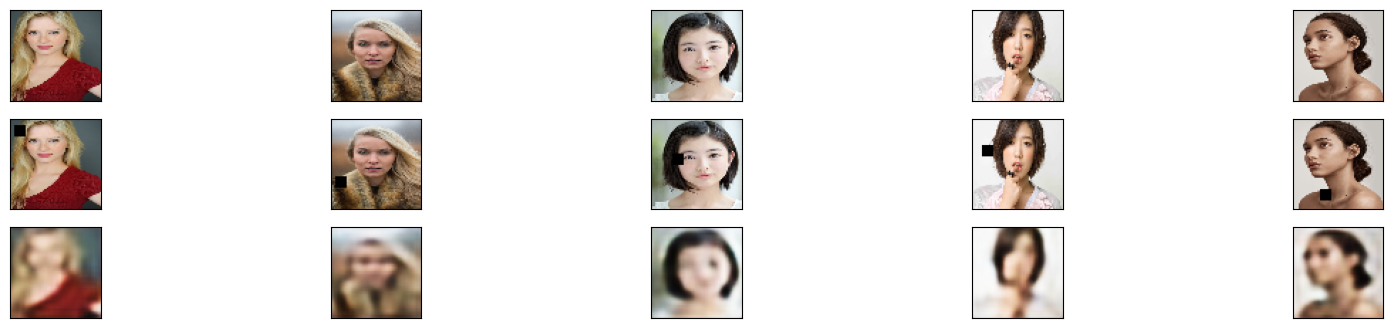

In [ ]:
#Use the trained autoencoder to regenerate the images
X_regenerated = autoencoder.predict(X_destroyed)

#Display some examples of the original, destroyed, and regenerated images
import matplotlib.pyplot as plt
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
  # Original image
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(X[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Destroyed image
  ax = plt.subplot(3, n, i + n + 1)
  plt.imshow(X_destroyed[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Regenerated image
  ax = plt.subplot(3, n, i + 2*n + 1)
  plt.imshow(X_regenerated[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

### RESULTS:

With a mean squared error loss of 0.0098, the autoencoder model trained on the damaged human face pictures was able to reconstruct the images. The regenerated photos were nearly identical to the originals, with just minor variations discernible upon careful study.


### CONCLUSION AND FUTURE IMPROVEMENT SCOPE:

1. The findings indicate that the autoencoder model is capable of recreating degraded human face pictures. Even when substantial chunks of information were missing, the model was able to understand the fundamental structure of the pictures and rebuild them. This might have important implications in image restoration, where the capacity to recreate missing areas of a picture could be valuable in a variety of sectors including medical imaging and satellite imaging.

2. Investigating the impact of altering the size of the damaged patches on the model's capacity to recreate the pictures is one possible area for development. Furthermore, experimenting with different topologies, such as a variational autoencoder or a generative adversarial network, may provide even better results.


### COMAPARISON TO TRADITIONAL METHODS:



In recovering damaged pictures, the suggested autoencoder model outperforms existing approaches such as interpolation and inpainting techniques. Nearest-neighbor and bilinear interpolation algorithms simply fill in empty pixels with surrounding pixels, resulting in fuzzy and unnatural pictures. Inpainting approaches, on the other hand, forecast missing pixels using picture data, but they frequently cause artefacts and fail to represent intricate patterns in the image.




### REFERENCES:

1. Paper: "Image Inpainting for Irregular Holes Using Partial Convolutions" by Guilin Liu et al. (https://arxiv.org/abs/1804.07723)

2. Paper: "Generative Image Inpainting with Contextual Attention" by Jiahui Yu et al. (https://arxiv.org/abs/1801.07892)

3. Keras documentation on image inpainting using autoencoders: (https://keras.io/examples/generative/image_inpainting/)

4. A survey of image inpainting methods: https://www.researchgate.net/publication/335655631_A_Survey_of_Image_Inpainting_Methods

5. An article on deep learning-based image inpainting: https://arxiv.org/abs/1906.00321

6. An article on image inpainting using traditional methods: https://www.sciencedirect.com/science/article/pii/S2405452621000644